In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:\\Users\\Ahtisham Ijaz\\Downloads\\diabetes.csv")
print(df.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

In [3]:
cols_with_zero=["Glucose","BloodPressure","Insulin","SkinThickness","BMI"]
df[cols_with_zero]=df[cols_with_zero].replace(0,np.nan)

df.fillna(df.median(),inplace=True)

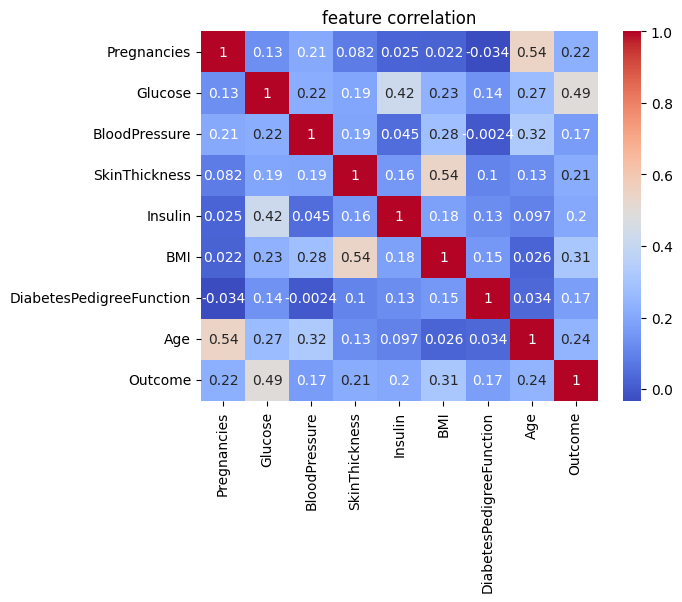

In [4]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("feature correlation")
plt.show()

In [5]:
X = df.drop("Outcome",axis=1)
Y=df["Outcome"]

In [6]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
rfc=RandomForestClassifier(random_state=42)

In [8]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

In [9]:
grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [10]:
best_model = grid_search.best_estimator_

# Step 10: Model Evaluation
y_pred = best_model.predict(X_test)

print("\nAccuracy:", accuracy_score(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

# Step 11: Cross Validation Score
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())





Accuracy: 0.7402597402597403

Confusion Matrix:
 [[78 21]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



NameError: name 'y' is not defined

In [11]:
import joblib

joblib.dump(best_model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
C:\Users\Ahtisham Ijaz\Desktop